## Round Trip

The newly appointed Secretary of State wants to visit all countries in the world in the shortest round trip.

We have data for the location (longitude and latitude) of all capitals from somewhere on the net.

Example of:
1. Traveling Salesman. 
2. Spherical distances.
3. NestedSolver for order problems.


In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import SalesmanProblem
from BayesicFitting import NestedSolver
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools

import matplotlib.pyplot as plt



In [2]:
#%matplotlib osx

In [3]:
# Read a list of capitals of countries around the world. With their longitudes and latitudes.

tbl = ascii.read( "data/capitals.csv" )
#print( tbl )



In [4]:
xdata = numpy.zeros( (191,2), dtype=float )
xdata[:,0] = tbl["Longitude"].data
xdata[:,1] = tbl["Latitude"].data
#print( xdata )

In [5]:
problem = SalesmanProblem( xdata=xdata, distance="spherical" )

print( problem )

TravelingSalesman in 2 dimensions with 191 nodes. Spherical distance


In [6]:
ns = NestedSolver( problem=problem )

s = ns.solve()

Fit all parameters of
  TravelingSalesman in 2 dimensions with 191 nodes. Spherical distance
Using a Distance Cost Function
Moving the walkers with   MoveEngine  ReverseEngine  SwitchEngine  LoopEngine
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Iteration     logZ        H       LowL     npar
   64264  -7.88e+03    618.6  -7.27e+03    191 
Parameters   [      178      157       56     

In [7]:
sl = ns.samples
pars = sl[-1].parameters
yfit = problem.result( pars )


In [8]:
# These datafile are from the 1980s. No breakup of the USSR, Jugoslavia etc.
ctbl = ascii.read( "data/coastlines.csv" )
cstx = ctbl["col1"].data
csty = ctbl["col2"].data

btbl = ascii.read( "data/boundaries.csv" )
bdrx = btbl["col1"].data
bdry = btbl["col2"].data


[ -166.757  174.246  169.596] [  -13.851  -14.527  -18.125]
[ -166.757  175.115  177.221] [  -13.851  -13.378   -8.520]


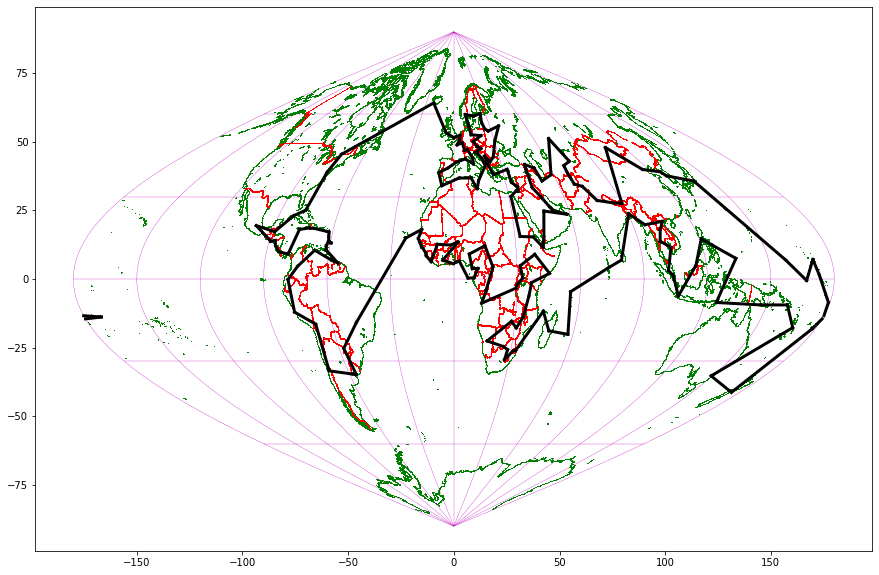

In [9]:
plt.figure( 1, figsize=(15,10) )
d2r = math.pi / 180
y = problem.xdata[pars,1]
t = problem.xdata[pars,0]
x = t * numpy.cos ( y * d2r )
yy = numpy.linspace( -90, 90, 181 )
cy = numpy.cos( yy * d2r )
for k in range( -180, 181, 30 ) :
    plt.plot( k * cy, yy, 'm-', linewidth=0.3 )

for k in range( -90, 90, 30 ) :
    xx = 180 * math.cos( k * d2r )
    plt.plot( [-xx, xx], [k, k], 'm-', linewidth=0.3 )
    
plt.plot( cstx * numpy.cos( csty * d2r ), csty, "g," )
plt.plot( bdrx * numpy.cos( bdry * d2r ), bdry, "r," )

rt = numpy.roll( t, -1 )
rx = numpy.roll( x, -1 )
ry = numpy.roll( y, -1 )

n2 = 191
for k in range( n2 ) :
    if x[k] < rx[k] :
        x0,x1,t0,t1,y0,y1 = (x[k],rx[k],t[k],rt[k],y[k],ry[k])
    else :
        x0,x1,t0,t1,y0,y1 = (rx[k],x[k],rt[k],t[k],ry[k],y[k])

    tm = 180
    if ( t1 - t0 ) < tm :
        plt.plot( [x0,x1], [y0,y1], 'k-', linewidth=3 )
    else :
        ym = y0 + ( y1 - y0 ) * ( tm - t1 ) / ( 360 - ( t1 - t0 ) )
        xm = tm * math.cos( d2r * ym )
        print( fmt( [x0, xm, x1] ), fmt( [y0,ym,y1] ) )
        plt.plot( [x1,xm], [y1,ym], 'k-', linewidth=3 )
        plt.plot( [x0,-xm], [y0,ym], 'k-', linewidth=3 )

plt.show()
